In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Country-data (1).csv')

In [3]:
df= data.copy()

In [4]:
df.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


In [5]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
df.duplicated().sum()

0

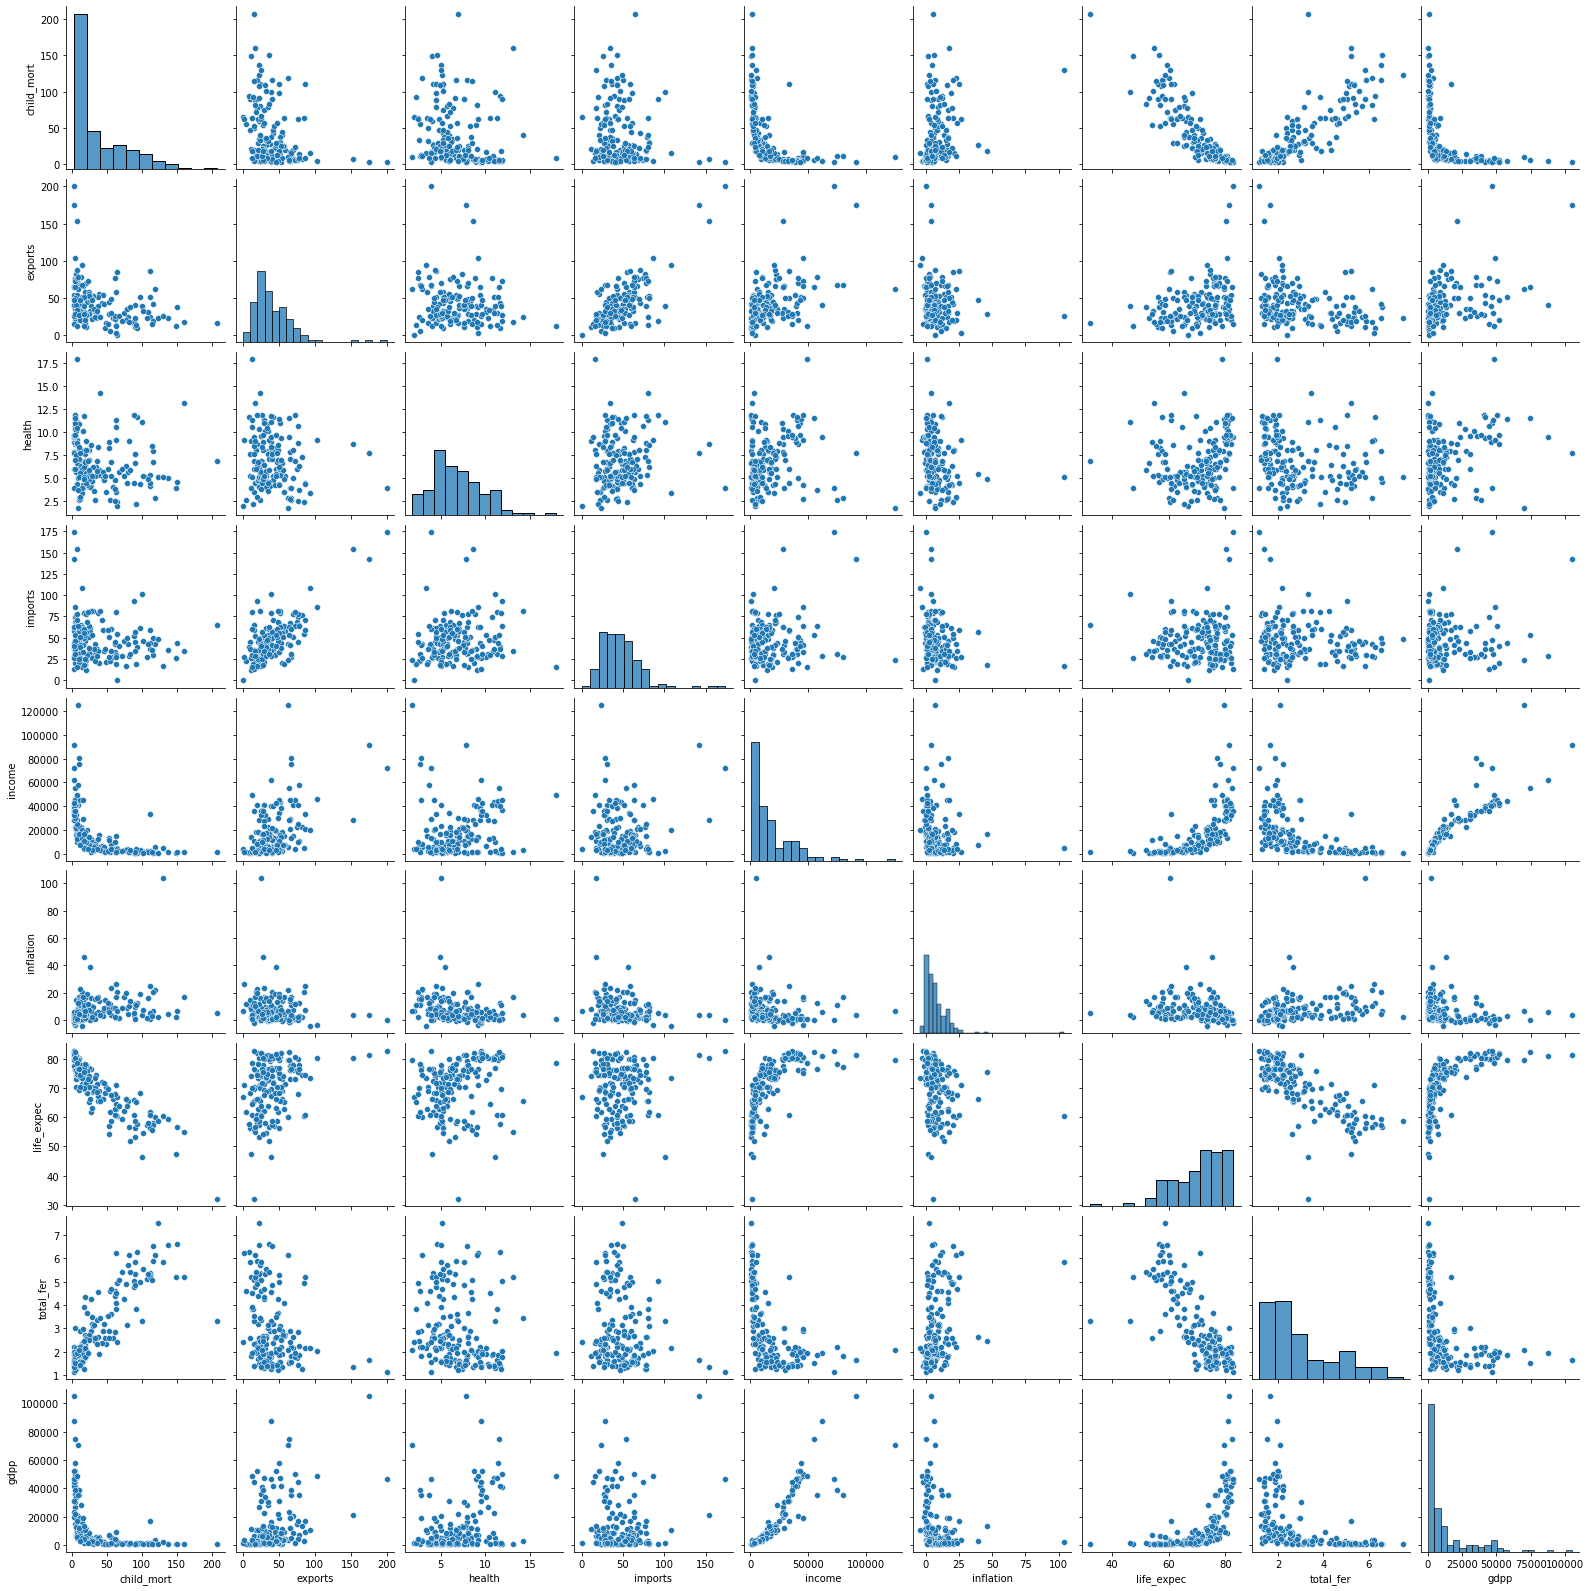

In [7]:
sns.pairplot(data=df)

In [8]:
X = df.drop('country',axis=1)

In [9]:
# def outlier_detection(cols):
#     Q1,Q3 = np.percentile(cols,[25,75])
#     IQR = Q3-Q1
#     upper_bound = Q3 + (1.5*IQR)
#     lower_bound = Q1 - (1.5*IQR)
#     return upper_bound, lower_bound

In [10]:
# for cols in X.columns:
#     upper_bound, lower_bound = outlier_detection(X[cols])
#     X[cols] = np.clip(X[cols],a_min=lower_bound, a_max=upper_bound)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
X = scaler.fit_transform(X)

In [14]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [15]:
df['level_kmeans'] = KMeans(n_clusters = 3, random_state = 606).fit_predict(X)

In [16]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,level_kmeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [17]:
df ['level_hi']= AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward').fit_predict(X)

In [20]:
df['level_kmeans'].replace({2:'Underdeveloped',1:'Devepoled',0:'Developing'},inplace=True)

In [22]:
df['level_hi'].replace({2:'Underdeveloped',0:'Devepoled',1:'Developing'},inplace=True)

In [30]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,level_kmeans,level_hi
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Underdeveloped,Underdeveloped
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Developing,Developing
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Developing,Developing
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Underdeveloped,Developing
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Developing,Developing


In [34]:
social_score = ["child_mort","health","life_expec","total_fer"]
economy_score = ['exports','imports','inflation','income','gdpp']

In [26]:
pca = PCA(n_components=1)

In [35]:
pca_social = pca.fit_transform(df[social_score])
pca_economy = pca.fit_transform(df[economy_score])


In [37]:
df_soc = pd.DataFrame(columns=["social_score"],data=pca_social)
df_eco = pd.DataFrame(columns=["economical_score"],data=pca_economy)

In [41]:
df_soc

,social_score
0,53.775644
1,-22.396407
2,-11.873049
3,81.332823
4,-28.648209
...,...
162,-7.391363
163,-21.684053
164,-15.202057
165,18.345675


In [43]:
df_final = pd.concat([df_eco,df_soc,df[['country','level_kmeans','level_hi']]],axis=1)

In [45]:
df_final

,economical_score,social_score,country,level_kmeans,level_hi
0,-19815.089842,53.775644,Afghanistan,Underdeveloped,Underdeveloped
1,-11338.961748,-22.396407,Albania,Developing,Developing
2,-8926.365857,-11.873049,Algeria,Developing,Developing
3,-14652.403430,81.332823,Angola,Underdeveloped,Developing
4,896.118375,-28.648209,Antigua and Barbuda,Developing,Developing
...,...,...,...,...,...
162,-17180.979269,-7.391363,Vanuatu,Developing,Developing
163,-100.464079,-21.684053,Venezuela,Developing,Developing
164,-17202.035855,-15.202057,Vietnam,Developing,Developing
165,-17209.330921,18.345675,Yemen,Underdeveloped,Developing


In [51]:
plt.figure(figsize=(12,8),dpi=1000)
sns.scatterplot(data=df_final,x='economical_score',y='social_score',hue='level_kmeans')

<AxesSubplot:xlabel='economical_score', ylabel='social_score'>

In [52]:
plt.figure(figsize=(12,8),dpi=1000)
sns.scatterplot(data=df_final,x='economical_score',y='social_score',hue='level_hi')

<AxesSubplot:xlabel='economical_score', ylabel='social_score'>